In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_excel("Levels.xlsx")
df.head()

,Job_ID,Title,Company,City,Salary,Levels,Analysis skills,Communication skills,Research,R,...,Deep learning,System design,Elasticsearch,Pandas,Apache,Torch,NoSQL,Master of Science,Windows,Computer networking
0,0,Data Scientist,Numerdox,Sacramento,110000,Jr.,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Data Scientist,Cepheid,Sunnyvale,150000,Staff,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,Data Scientist,Tinder,San Francisco,130000,Jr.,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,Data Scientist,JPL/NASA,Pasadena,100000,Jr.,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,Data Scientist,Indeed,San Francisco,223000,Sr.,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Univariate analysis

In [24]:
#check the number of unique levels for categorical data to determine suitable visualisation tool

print("Number of unqiue classes in Title :", len(df["Title"].unique()))
print("Number of unqiue classes in Company :", len(df["Company"].unique()))
print("Number of unqiue classes in City :", len(df["City"].unique()))
print("Number of unqiue classes in Levels :", len(df["Levels"].unique()))

Number of unqiue classes in Title : 9
Number of unqiue classes in Company : 277
Number of unqiue classes in City : 48
Number of unqiue classes in Levels : 6


As there is a large number of unique companies and cities, not suitable to display countplot of entire data

In [33]:
#visualising company

company = pd.DataFrame(df["Company"].value_counts())
company.describe()

,Company
count,277.000000
mean,2.393502
std,6.714711
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,94.000000


Every company has a mean of only 1 employee, with 75% of companies having 2 or fewer employees.   
Due to the low sample size, company is not a suitable predictor for our model. It will be ignored.

In [34]:
#visualising city

city = pd.DataFrame(df["City"].value_counts())
city.describe()

,City
count,48.000000
mean,13.812500
std,33.657003
min,1.000000
25%,1.000000
50%,2.000000
75%,9.000000
max,195.000000


Similary, every city has a mean of only 2 employees, with 75% of cities having 9 or fewer employees.
Due to the low sample size, company is not a suitable predictor for our model. It will be ignored.

<AxesSubplot:xlabel='count', ylabel='Levels'>

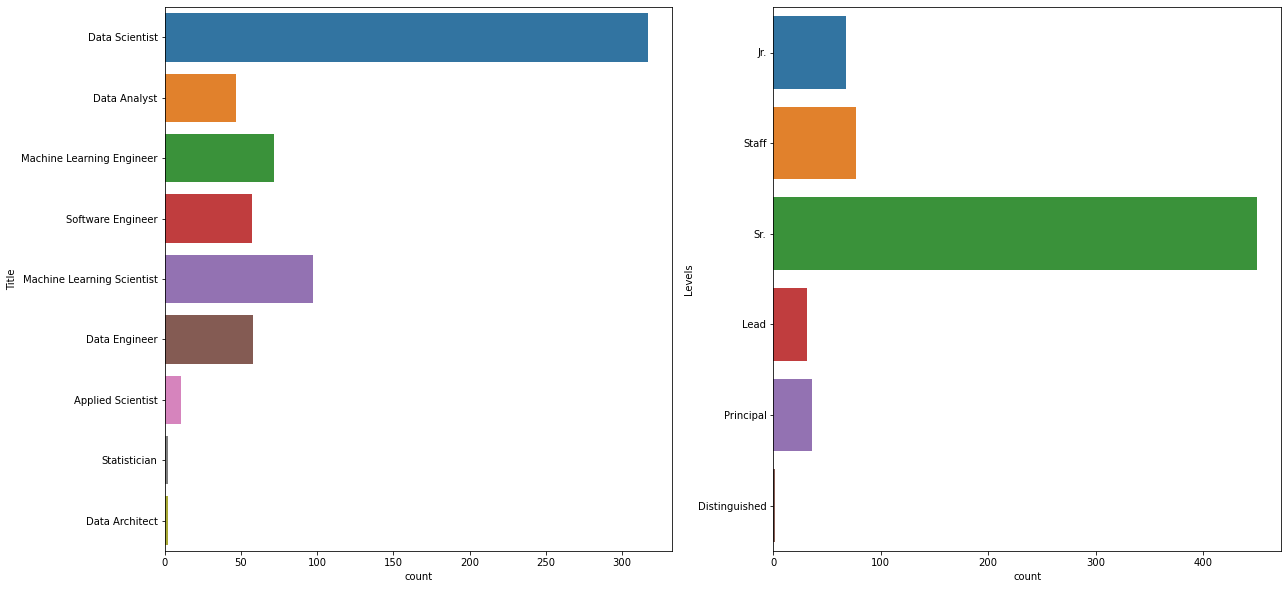

In [40]:
#visualising other categorical data

f, axes = plt.subplots(1, 2, figsize=(20, 10))
sb.countplot(y = "Title", data = df, ax = axes[0])
sb.countplot(y = "Levels", data = df, ax = axes[1])

For the variable 'titles', data scientist is the most common occupation for our dataset by a significant margin.   
For the variable 'levels', Sr. is the most common experience level for our datasetby a significant margin.

Possible point for recommendations: the skew in our data may affect our model. Conduct further studies on a more rounded dataset.

In [47]:
#visualising salary

salary = pd.DataFrame(df["Salary"])
salary.describe()

,Salary
count,663.000000
mean,157632.235294
std,27362.644473
min,59000.000000
25%,140000.000000
50%,160000.000000
75%,170000.000000
max,350000.000000


<AxesSubplot:>

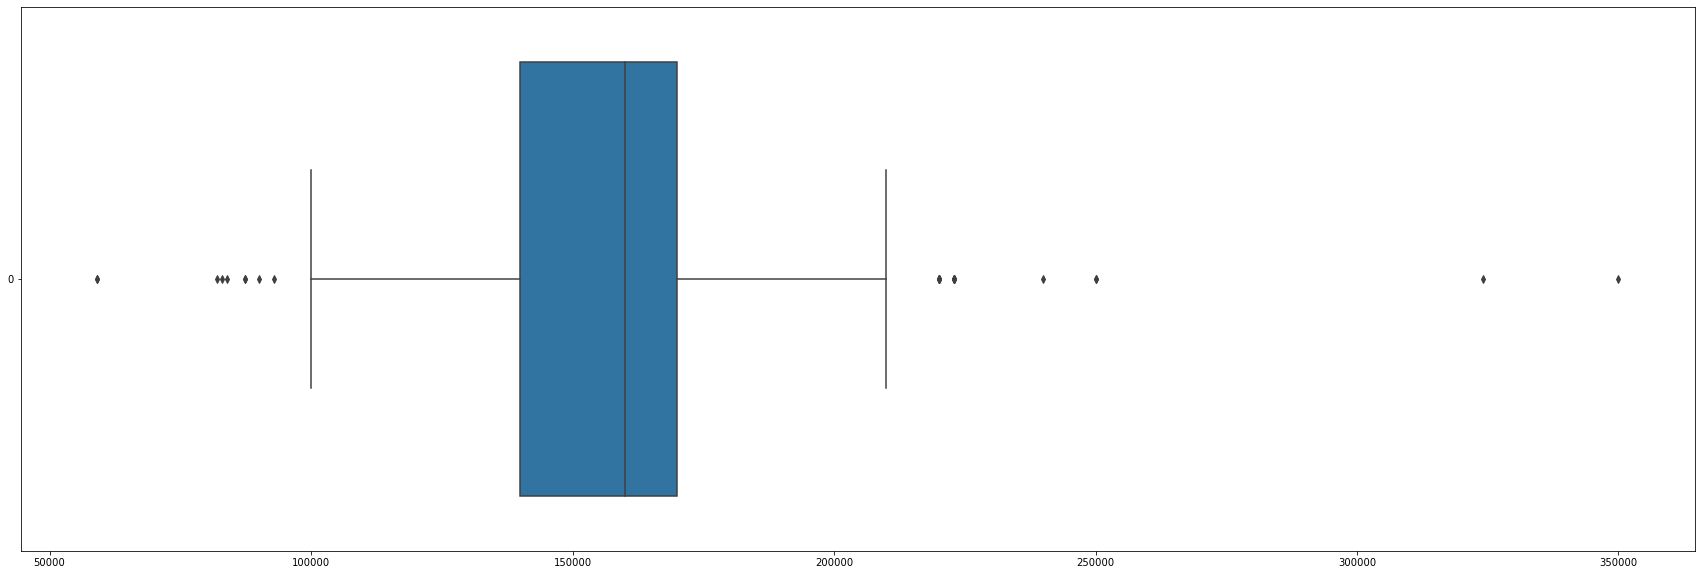

In [48]:
f, axes = plt.subplots(figsize=(30, 10))
sb.boxplot(data = df["Salary"], orient = "h")

The vast majority of data points fall within 25% of the mean.   
However, there are 13 outliers which deviate significantly from the mean. May consider removing them from train set.

### Bivariate analysis

<AxesSubplot:xlabel='Salary', ylabel='Title'>

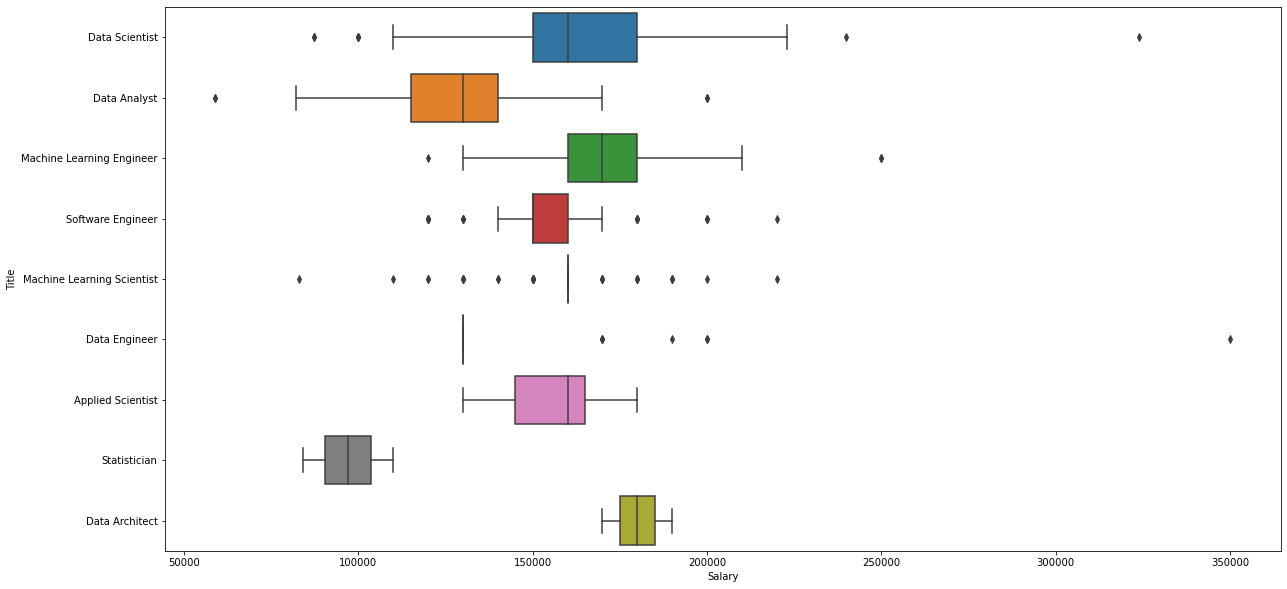

In [53]:
# Salary distribution for different job titles

plt.figure(figsize=(20,10))
sb.boxplot(x='Salary', y='Title', data=df)

Statistian has the lowest mean salary, with the rest having comparable mean salaries.   
Machine learning scientists and data engineers have every high variance. 